In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

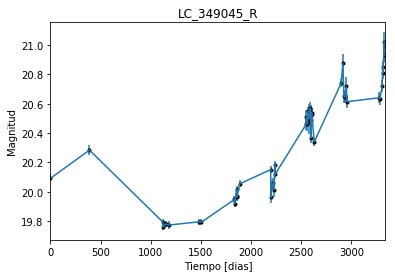

In [5]:
data = np.genfromtxt('LC_349045_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_349045_R')
plt.savefig("LC_349045_R.pdf")

In [6]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [7]:
%%capture capt
sample = model.run_mcmc(20000)

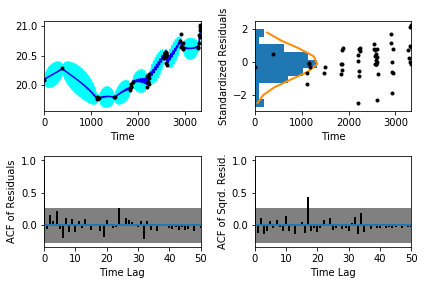

In [8]:
sample.assess_fit()

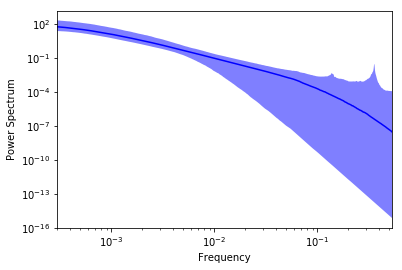

In [9]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

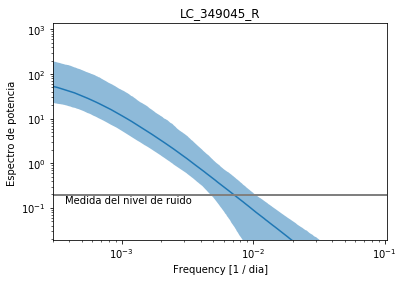

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_349045_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_349045_R')

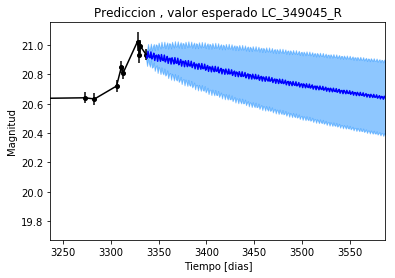

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_349045_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_349045_R')

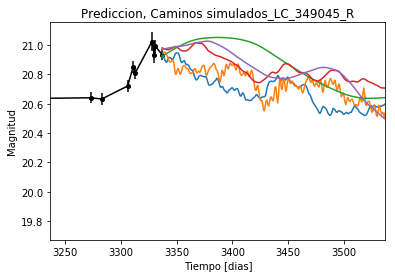

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_349045_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


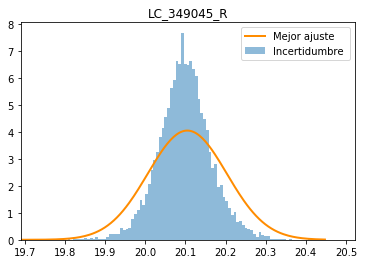

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_349045_R')
plt.savefig("Mejor_ajuste_LC_349045_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_349045_R')

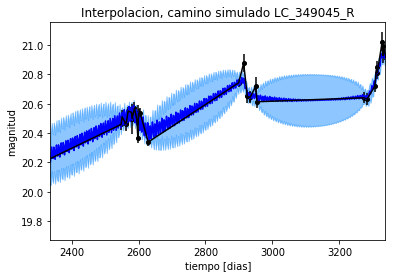

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_R')

Text(0.5,1,'Interpolacion, camino simulado LC_349045_R')

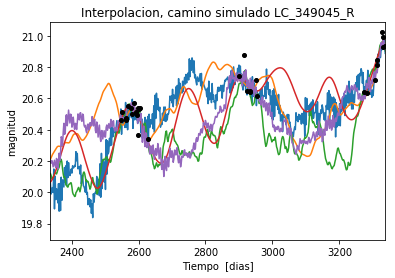

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_R')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 443.345610509
Median: 0.016791715775
Standard deviation: 0.20770019457
68% credibility interval: [ 0.00113724  0.21887919]
95% credibility interval: [  3.69210762e-04   8.16808673e-01]
99% credibility interval: [  3.14567090e-04   1.00709183e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 398.2636111
Median: 0.00713293353582
Standard deviation: 0.131746088549
68% credibility interval: [ 0.00055674  0.07993116]
95% credibility interval: [  3.25204652e-04   4.86875101e-01]
99% credibility interval: [  3.05257855e-04   8.93292320e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 458.308415787
Median: 0.0999494785351
Stan

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 232.569398927
Median: 71.1702265972
Standard deviation: 2.3070906438
68% credibility interval: [ 68.9423783  73.1165324]
95% credibility interval: [ 66.23615938  75.80170011]
99% credibility interval: [ 64.15279733  77.65096021]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 338.088301189
Median: 1.48638877345
Standard deviation: 2.92466508119
68% credibility interval: [ 0.15330641  5.49472127]
95% credibility interval: [  0.02966227  10.35201723]
99% credibility interval: [  0.01678109  14.58591065]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 161.779768558
Median: 4.40995989067
Standard deviation: 15.4923739156
68% credibility interval: [  0.18324434  19.92468729]
95% credibility interval: [  5.6650652

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10009.5147455
Median: 1.20860011648e-46
Standard deviation: 1.06913524786e+126
68% credibility interval: [  1.60558106e-81   5.05202173e-14]
95% credibility interval: [  3.41908845e-121   2.56367499e-002]
99% credibility interval: [  3.12118121e-126   5.96792984e+078]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1014.40686707
Median: 20.2482157401
Standard deviation: 0.1686019888
68% credibility interval: [ 20.09120464  20.40280991]
95% credibility interval: [ 19.91729328  20.57570016]
99% credibility interval: [ 19.76734565  20.73961547]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 112.672349637
Median: 0.191712563517
Standard deviation: 0.294451682377
68% credibility interval: [ 0.          0.64124012]
95% credibility interval: [ 0.          0.99817996]
99% credibility interval: [ 0.          1.05666583]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 112.672349637
Median: 0.191712563517
Standard deviation: 0.294451682377
68% credibility interval: [ 0.          0.64124012]
95% credibility interval: [ 0.          0.99817996]
99% credibility interval: [ 0.          1.05666583]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1575.70975543
Median: 0.0
Standard deviation: 0.00017270782382
68% credi

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 232.569398927
Median: 71.1702265972
Standard deviation: 2.3070906438
68% credibility interval: [ 68.9423783  73.1165324]
95% credibility interval: [ 66.23615938  75.80170011]
99% credibility interval: [ 64.15279733  77.65096021]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 825.400846382
Median: 0.106862038773
Standard deviation: 0.0969572001397
68% credibility interval: [ 0.07199061  0.18019928]
95% credibility interval: [ 0.0527679  0.3481196]
99% credibility interval: [ 0.043517    0.57024312]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 326.963483978
Median: 1.28938771792
Standard deviation: 0.281570745288
68% credibility interval: [ 1.01001382  1.60531895]
95% credibility interval: [ 0.82172893  1.88331137]
99% credibility interval: [ 0.73824243  1.97603343]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 222.994169094
Median: 0.019907405249
Standard deviation: 0.916165230398
68% credibility interval: [  1.84779444e-04   4.08832961e-01]
95% credibility interval: [  1.30847679e-06   2.77188383e+00]
99% credibility interval: [  2.17169482e-82   6.82586169e+00]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 443.345610509
Median: (-0.10550546184-0.693076146956j)
Standard deviation: 2.26405028605
68% credibility interval: [-1.37525853-0.30193095j -0.00714547-0.16835017j]
95% credibility interval: [ -5.13216025e+00+0.j          -2.31981963e-03-1.59483885j]
99% credibility interval: [ -6.32774458e+00+0.j          -1.97648332e-03-0.74887779j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 398.2636111
Median: (-0.0448175431894+2.18460692042j)
Standard deviation: 2.02683935052
68% credibility interval: [-0.50222228+0.83418194j -0.00349813+2.23746359j]
95% credibility interval: [ -3.05912648e+00 +6.43121540e+00j  -2.04332109e-03 +4.87958123e-04j]
99% credibility interval: [ -5.61272118e+00+6.00260114j  -1.91799167e-03+0.j       